In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%precision 3
sample = np.arange(10)

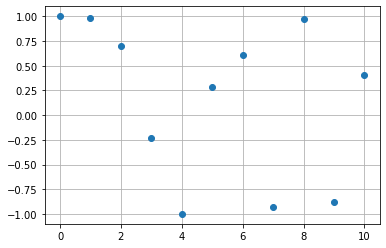

In [2]:
#補間 scipy.interpolate.interp1d
#cos関数を使って例となるグラフを用意
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)
#このようなグラフでデータ間の補間を計算し、曲線を描く

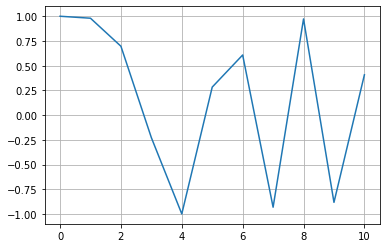

In [3]:
#線形補間
#補間後の関数f(x)をつくる
f = interpolate.interp1d(x, y, 'linear')
#y=f(x)を描画する
plt.plot(x, f(x))
plt.grid(True)
#点と点の間を1次関数でつないで補間した結果

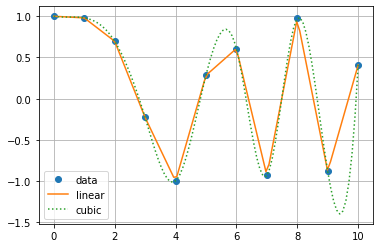

In [4]:
#スプライン三次補間
#補間後の関数f2(x)をつくる
f3 = interpolate.interp1d(x, y, 'cubic')
#ただし、このままではxの値が粗すぎて曲線にならないので、xの値を取り直して線形補間と比較
xnew = np.linspace(0, 10, num=100, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f3(xnew), ':')
#凡例を追加
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)
#点と点の間を1次関数でつないで補間した結果
#オマケで描画したグラフを画像としてファイル出力してみる
plt.savefig('interpolate.png')

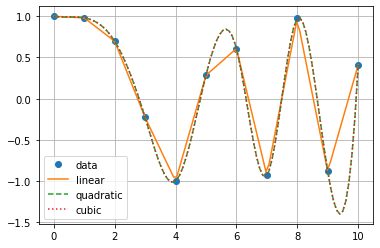

In [5]:
#ちなみにスプライン二次補間は 'quadratic'
f2 = interpolate.interp1d(x, y, 'cubic')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'linear', 'quadratic', 'cubic'], loc='best')
plt.grid(True)
plt.savefig('interpolate_2.png')

In [6]:
#行列の分解
#その前に、行列計算の復習から
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
E = np.array([[1,0],[0,1]])
print(np.dot(A, E))
print(np.dot(A, B))
print(np.dot(E, B))
print(A@B)

[[1 2]
 [3 4]]
[[19 22]
 [43 50]]
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]


In [7]:
#特異値分解
#np.linalg.svd(matrix)で計算する  返り値は3つの行列となる
C = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print('C = \n', C)
U, s_diags, V_t = sp.linalg.svd(C)
#それぞれ確認してみる
print('U = \n', U)
print('s_diags = \n', s_diags)
print('V_t = \n', V_t)
#sは対角行列だが、その対角成分だけとなっている
print('s_diags = \n', np.diag(s_diags))
#Cがm×n行列のとき、U：m×m、V_t：n×n、s_diags：n×nとなる
#なので、計算のためにsをm×nに変換する　⇒　S = scipy.linalg.diagsvd(s,m:row_num, n:column_num)
#diagsvdの引数として行数と列数の指定が必要なので、Cの行数(m)と列数(n)を取得
#sはnp.diagせずにそのまま与えること
m, n = C.shape
S = sp.linalg.diagsvd(s_diags, m, n)
print('S = \n', S)
# C = U @ S @ V_t を確認する
print('C_ = \n', U@S@V_t)

C = 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
U = 
 [[-0.37  -0.929]
 [-0.929  0.37 ]]
s_diags = 
 [19.538  1.81 ]
V_t = 
 [[-0.304 -0.371 -0.437 -0.504 -0.57 ]
 [ 0.712  0.403  0.094 -0.215 -0.524]
 [-0.374 -0.008  0.862 -0.206 -0.274]
 [-0.365  0.371 -0.159  0.665 -0.512]
 [-0.357  0.75  -0.179 -0.464  0.251]]
s_diags = 
 [[19.538  0.   ]
 [ 0.     1.81 ]]
S = 
 [[19.538  0.     0.     0.     0.   ]
 [ 0.     1.81   0.     0.     0.   ]]
C_ = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [8]:
#LU分解
#1次方程式Ax=bの定義
A = ([[6,4,1],[1,8,-2],[3,2,0]])
b = ([7,6,8])
#sp.linalg.lu_factor(A)は L+U からLの単位対角成分を除いた行列と、置換行列を表す指数を返す
LU = sp.linalg.lu_factor(A)
#それらの返り値は、そのままlinalg.solve(LU, b)で使えばよい
x = sp.linalg.lu_solve(LU, b)
print('(x1, x2, x3) =', x)

(x1, x2, x3) = [ 4. -2. -9.]


In [9]:
#practice5-13 特異値分解
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
U, s_diags, V_t = sp.linalg.svd(B)
m, n = B.shape
S = sp.linalg.diagsvd(s_diags, m, n)
print('S =\n',S)
B_x = U@S@V_t
print('B_x =\n',B_x)

S =
 [[2.546e+01 0.000e+00 0.000e+00]
 [0.000e+00 1.291e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.386e-15]
 [0.000e+00 0.000e+00 0.000e+00]]
B_x =
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [10]:
#practice5-14 LU分解 Ax=bを解く
A = ([[3,1,1],[1,1,0],[1,0,1]])
b = ([1,1,1])
LU = sp.linalg.lu_factor(A)
x = sp.linalg.lu_solve(LU, b)
print('(x1, x2, x3) =', x)
b_x = A@x
print('b_x =', b_x)

(x1, x2, x3) = [-1.  2.  2.]
b_x = [1. 1. 1.]


In [11]:
#積分と微分方程式
#積分計算
from scipy import integrate
import math

In [12]:
#関数の定義
def func1(x):
    return 4/(1+x**2)

In [13]:
#積分計算の実行　integrate.quad(function, start, end)
integrate.quad(func1, 0, 1) #出力2つめは測定誤差 

(3.142, 0.000)

In [14]:
#この程度の計算なら、無名関数を使ってもよい
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.142, 0.000)

In [15]:
#ライブラリには三角関数やπが用意されている
from numpy import sin
from numpy import cos
from numpy import tan
from math import pi

In [16]:
integrate.quad(sin, 0, pi)

(2.000, 0.000)

In [17]:
integrate.quad(cos, 0, pi)

(0.000, 0.000)

In [ ]:
#微分方程式　とりあえずとばす

In [18]:
#線形計画法　一次式で表される制約条件下で、一次の目的関数の値を最大化/最小化する変数の値を求める（制約も目的も線形）

In [21]:
#最適化ライブラリのインポート scipy.optimize.fsolve
from scipy.optimize import fsolve

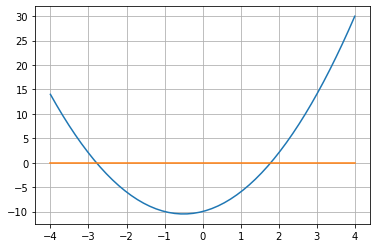

In [38]:
#目的関数の定義とグラフ
def f(x):
    return 2*x**2+2*x-10
def g(x):
    return 0
def h(x):
    return f(x)-g(x)
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x))) #y=0のグラフ
plt.grid(True)

In [34]:
#グラフから、視覚的に解は-3と2の近くにあることがわかるので、これを引数としてやる
x1 = fsolve(f,2)
x2 = fsolve(f,-3)
print('x1, x2 =',x1, x2)

x1, x2 = [1.791] [-2.791]


In [40]:
x = fsolve(h,[-100,100])
x

array([-2.791,  1.791])

In [46]:
#y=x^2+3x-5とy=4x+9の交点を求める
def a(x):
    return x**2+3*x-5
def b(x):
    return 4*x+9

In [63]:
#方程式a(x)-b(x)=0を解けばよい
def c(x):
    return a(x)-b(x)
#定義域の範囲で最適化
x = fsolve(c, [-100,100])
y = a(x)
for i in range (len(x)):
    print('交点の座標(x',i+1,',','y',i+1,'):',x[i],',',y[i])

交点の座標(x 1 , y 1 ): -3.274917217635375 , -4.0996688705415
交点の座標(x 2 , y 2 ): 4.274917217635375 , 26.0996688705415


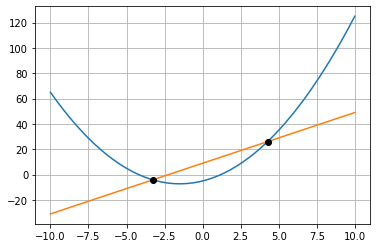

In [66]:
#上記の解が正しいことを、グラフを描いて確かめる
x_plot = np.linspace(-10,10)
plt.plot(x_plot,a(x_plot),x_plot,b(x_plot))
for i in range (len(x)):
    plt.plot(x[i],y[i],color="k", marker="o")
plt.plot
plt.grid(True)

In [72]:
#practice 5-17
def f2(t):
    return 5*t-10
x = fsolve(f2,[-100,100])
print(x)

[2. 2.]


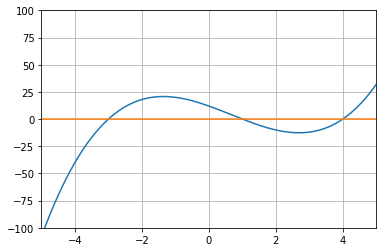

In [103]:
#practice 5-18
def f3(t):
    return t**3-2*t**2-11*t+12
#グラフ描画で視覚的に確認
x_plot = np.linspace(-100,100,10000) #開始値、終了値、要素数
plt.plot(x_plot,f3(x_plot))
plt.plot(x_plot,np.zeros(len(x_plot)))
plt.ylim(-100,100)
plt.xlim(-5,5)
plt.grid(True)

In [104]:
x = fsolve(f3,[-4,2,4])
print(x)

[-3.  1.  4.]
